# Modelos de regresion lineal
## Con datos simulados
**y = a + b x**

X = 100 valores distribuidos segun una N(1.5, 2.5)

Ye = 5 + 1.9 * x + e
e estará distribuido segun una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
df = pd.DataFrame(
    {
        "x" : x_list,
        "y" : y_act_list,
        "y_pred" : y_pred_list
    }
)

In [8]:
df.head()

,x,y,y_pred
0,1.268633,8.049971,7.410402
1,1.662082,9.548981,8.157956
2,6.464628,15.763055,17.282793
3,0.996172,8.000841,6.892727
4,6.196189,16.921565,16.772758


In [9]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]

Text(0.5,1,'Valor Actual vs Prediccion')

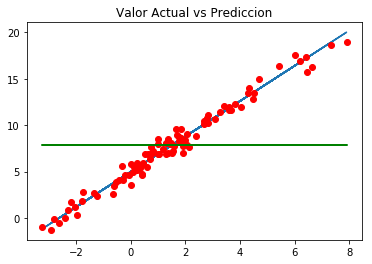

In [10]:
plt.plot(x,y_pred)
plt.plot(x,y_act,"ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Prediccion")

In [11]:
df["SSR"] = (df["y_pred"] - np.mean(y_act))**2
df["SSD"] = (df["y_pred"] - df["y"]) ** 2
df["SST"] = (df["y"] - np.mean(y_act)) ** 2

In [12]:
df.head()

,x,y,y_pred,SSR,SSD,SST
0,1.268633,8.049971,7.410402,0.179755,0.409049,0.046481
1,1.662082,9.548981,8.157956,0.104703,1.934952,2.939868
2,6.464628,15.763055,17.282793,89.272572,2.309603,62.863944
3,0.996172,8.000841,6.892727,0.886704,1.227917,0.027710
4,6.196189,16.921565,16.772758,79.894663,0.022143,82.576980


In [13]:
SSR = sum(df["SSR"])
SSD = sum(df["SSD"])
SST = sum(df["SST"])

In [14]:
SSR

1964.0431152322187

In [15]:
SSD

47.51813115593564

In [16]:
SST

1976.548029894889

In [17]:
SSR+SSD

2011.5612463881544

In [18]:
R2 = SSR / SST

In [19]:
R2

0.993673356542044

(array([ 3.,  7.,  8., 10., 24., 21.,  9.,  8.,  5.,  5.]),
 array([-1.60154253, -1.28309978, -0.96465704, -0.64621429, -0.32777154,
        -0.0093288 ,  0.30911395,  0.6275567 ,  0.94599944,  1.26444219,
         1.58288493]),
 <a list of 10 Patch objects>)

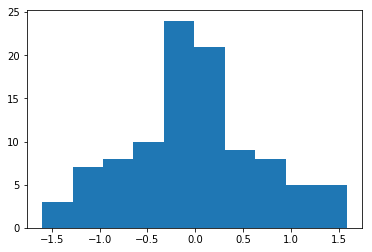

In [20]:
plt.hist(df["y_pred"] - df["y"])

## Obteniendo la recta de regresion

In [23]:
x_mean = df["x"].mean()
y_mean = df["y"].mean()

In [25]:
x_mean, y_mean

(1.485067400672412, 7.834376884393216)

In [27]:
df["beta_n"] = ( df["x"] - x_mean ) * ( df["y"] - y_mean )
df["beta_d"] = ( df["x"] - x_mean ) ** 2

In [28]:
df.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d
0,1.268633,8.049971,7.410402,0.179755,0.409049,0.046481,-0.046662,0.046844
1,1.662082,9.548981,8.157956,0.104703,1.934952,2.939868,0.303510,0.031334
2,6.464628,15.763055,17.282793,89.272572,2.309603,62.863944,39.481336,24.796024
3,0.996172,8.000841,6.892727,0.886704,1.227917,0.027710,-0.081384,0.239019
4,6.196189,16.921565,16.772758,79.894663,0.022143,82.576980,42.810843,22.194663


In [29]:
beta = df["beta_n"].sum() / df["beta_d"].sum()

In [31]:
alpha = y_mean - beta * x_mean

In [33]:
alpha, beta

(5.03787642061344, 1.8830798268910696)

# y = 5.03787642061344 + 1.8830798268910696 * X 

In [35]:
df["y_model"] = alpha + beta * df["x"]

In [36]:
df.head()

,x,y,y_pred,SSR,SSD,SST,beta_n,beta_d,y_model
0,1.268633,8.049971,7.410402,0.179755,0.409049,0.046481,-0.046662,0.046844,7.426813
1,1.662082,9.548981,8.157956,0.104703,1.934952,2.939868,0.303510,0.031334,8.167709
2,6.464628,15.763055,17.282793,89.272572,2.309603,62.863944,39.481336,24.796024,17.211287
3,0.996172,8.000841,6.892727,0.886704,1.227917,0.027710,-0.081384,0.239019,6.913748
4,6.196189,16.921565,16.772758,79.894663,0.022143,82.576980,42.810843,22.194663,16.705794


In [37]:
SSR_model = sum((df["y_model"] - y_mean)**2)
SSD_model = sum((df["y_model"] - df["y"]) ** 2)
SST_model = sum((df["y"] - y_mean) ** 2)

In [38]:
SSR_model, SSD_model, SST_model

(1929.201909795562, 47.346120099328495, 1976.5480298948892)

In [40]:
R2_model = SSR_model/SST_model

In [41]:
R2,R2_model

(0.993673356542044, 0.9760460563653265)

Text(0.5,1,'Valor Actual vs Prediccion')

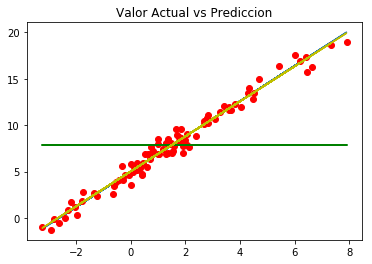

In [46]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list)+1)]
plt.plot(df["x"],df["y_pred"])
plt.plot(df["x"],df["y"],"ro")
plt.plot(df["x"],y_mean, "g")
plt.plot(df["x"],df["y_model"],"y")
plt.title("Valor Actual vs Prediccion")